In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
digit = load_digits()

In [4]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digit.data.shape

(1797, 64)

In [7]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digit.target.shape

(1797,)

In [9]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digit.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digit.data[123].reshape(8,8)

array([[ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 14.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0., 15., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 16., 13.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15., 14.,  5.,  0.,  0.],
       [ 0.,  0., 12., 12.,  8., 15.,  1.,  0.],
       [ 0.,  0.,  5., 16., 16., 16.,  2.,  0.]])

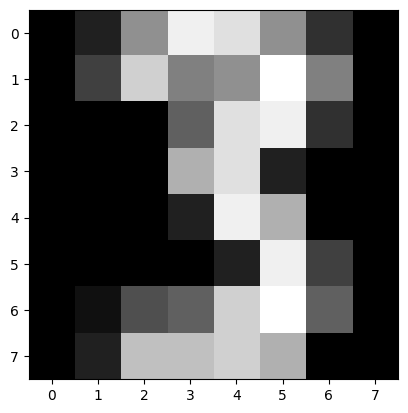

In [15]:
plt.imshow(digit.data[13].reshape(8,8), cmap="gray")
plt.show()

In [16]:
digit.target[13]

3

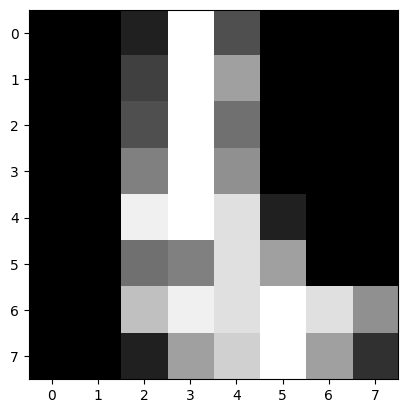

In [17]:
plt.imshow(digit.data[563].reshape(8,8), cmap="gray")
plt.show()

In [18]:
digit.target[563]

1

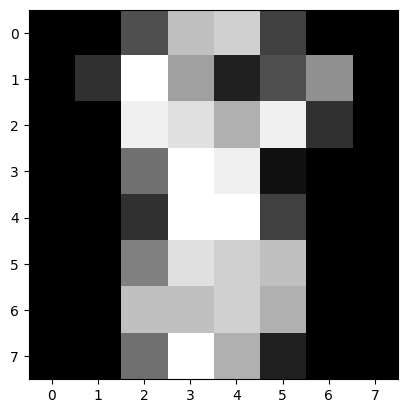

In [19]:
plt.imshow(digit.data[1763].reshape(8,8), cmap="gray")
plt.show()

In [20]:
digit.target[1763]

8

In [22]:
digit_data = pd.DataFrame(digit.data, columns=digit.feature_names)

In [23]:
digit_data["target"] = digit.target

In [25]:
digit_data[45:87]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
45,0.0,0.0,9.0,16.0,13.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,14.0,12.0,8.0,0.0,0.0,3
46,0.0,1.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,14.0,14.0,4.0,0.0,0.0,0.0,5
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1
48,0.0,0.0,2.0,15.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,12.0,15.0,6.0,0.0,0.0,0
49,0.0,0.0,1.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,14.0,8.0,0.0,0.0,0
50,0.0,0.0,0.0,5.0,14.0,12.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,13.0,3.0,0.0,2
51,0.0,0.0,0.0,3.0,15.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,9.0,14.0,7.0,0.0,2
52,0.0,0.0,3.0,12.0,16.0,16.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,0.0,7
53,0.0,0.0,4.0,8.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,12.0,1.0,0.0,0.0,8
54,0.0,0.0,0.0,1.0,14.0,14.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,5.0,0.0,2


In [26]:
X = digit.data

In [27]:
y = digit.target

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=24)

In [29]:
model = RandomForestClassifier(n_estimators=150)

In [30]:
model.fit(X_tr, y_tr)

RandomForestClassifier(n_estimators=150)

In [31]:
y_pr = model.predict(X_te)

In [32]:
accuracy_score(y_te, y_pr)

0.9740740740740741

In [33]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.96      1.00      0.98        52
           2       1.00      1.00      1.00        57
           3       1.00      0.95      0.98        62
           4       0.98      0.98      0.98        54
           5       0.93      0.96      0.95        54
           6       0.98      1.00      0.99        59
           7       0.94      1.00      0.97        44
           8       0.96      0.94      0.95        51
           9       0.98      0.94      0.96        64

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.97      0.97      0.97       540



<Axes: >

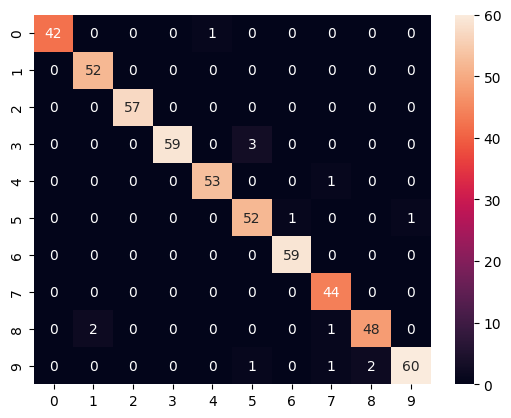

In [34]:
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True)